# Assignment 2 - Object Detection | Semantic Segmentation

This notebook contains the required task for the second assignment of the Software for Advanced Machine Learning course. Read the task description and implement the empty code cells. Each section represents a stage along implementing your task [Object Detection or Semantic Segmantation], from loading and inspecting the dataset to testing a **pre-trained** model. The sections are to guide you but you do not have to follow that specific order. 

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [Canvas](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise inference can be very slow.

## Rules and Comments
- From the list of datasets and tasks listed in canvas, each student was atributed **1 task and 1 dataset** to use within this assignment. Please confirm yours in the Canvas assignment's description. 
- The emphasis of this assignment is put in the way you use and compare the different models. The metrics you present are very important.
- As always, copying others' code will make you fail the homework automatically (and thus the course). Remember that you will have to defend the assignment at the end of the semester.
- **Deadline is November 26**
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID below for easier identification.

**Name:**  Lin Moule
**Neptun ID:** GQ593o

## Task description
Given your task (Semantic Segmentation or Object Detection), you have to test three (3) pretrained models on the test set of a given dataset, comparing the results between the models. For the comparison, you have to use at least three (3) metrics commonly used in your task.

For example, if student A is given Object Detection task and the Ballons v2 dataset, then his/her task is to choose 3 pretrained object detection models [R-CNN, YOLO, ...] and evaluate them on the Ballons v2 test set, comparing the results using 3 metrics [mAP, Recall, ...]. If a dataset does not have a testing set, then the student should split at least 10% of the training set to create the test set.

For running test/evaluation/inference on a pre-trained model, it is important to know what are the model requirements, so that the input is preprocessed accordingly.
Make sure to explore the data and **present detailed evaluation metrics**.

**Please answer the questions.**



## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [2]:
# ADD YOUR CODE HERE
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision.datasets as datasets
import cv2
import torchvision.models as models


## 1. Dataset 
Load the dataset you were given. If your data does not have a test set, split a portion of your training set (at least 10%).
Explore the dataset by visualizing the images and annotations.


#### Loading the dataset
Show some images and annotations of your dataset

In [3]:
# ADD YOUR CODE HERE
# Load dataset
voc_trainset = datasets.VOCDetection('voc',year='2012', image_set='train', download=True)



  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting voc/VOCtrainval_11-May-2012.tar to voc


In [4]:
voc_test = datasets.VOCDetection('voc',year='2012', image_set='val', download=False)
voc_trainval = datasets.VOCDetection('voc',year='2012', image_set='trainval', download=False)

In [5]:
print(len(voc_trainset))
print(len(voc_test))
print(len(voc_trainval))

5717
5823
11540


In [6]:
train_dataset, test_dataset = torch.utils.data.random_split(voc_test, [4000, 1823])

In [7]:
voc_test = test_dataset

In [ ]:
len(voc_test)

1823

In [ ]:
for i, sample in enumerate(voc_trainset, 1):
    print(sample)
    image_data, annotation_image = sample[0], sample[1]['annotation']
    objects = annotation_image['object']
    show_image = np.array(image_data)
    print('{} object:{}'.format(i, len(objects))) # how many object it contain
    print(show_image.shape)
    print(objects)
    if i == 2:
      break
len(voc_trainset)

(<PIL.Image.Image image mode=RGB size=500x442 at 0x7FB567861850>, {'annotation': {'folder': 'VOC2012', 'filename': '2008_000008.jpg', 'source': {'database': 'The VOC2008 Database', 'annotation': 'PASCAL VOC2008', 'image': 'flickr'}, 'size': {'width': '500', 'height': '442', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]}})
1 object:2
(442, 500, 3)
[{'name': 'horse', 'pose': 'Left', 'truncated': '0', 'occluded': '1', 'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}, 'difficult': '0'}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'occluded': '0', 'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}, 'difficult': '0'}]
(<

5717

In [ ]:
voc_trainset[0]

(<PIL.Image.Image image mode=RGB size=500x442 at 0x7FB567B10110>,
 {'annotation': {'filename': '2008_000008.jpg',
   'folder': 'VOC2012',
   'object': [{'bndbox': {'xmax': '471',
      'xmin': '53',
      'ymax': '420',
      'ymin': '87'},
     'difficult': '0',
     'name': 'horse',
     'occluded': '1',
     'pose': 'Left',
     'truncated': '0'},
    {'bndbox': {'xmax': '289', 'xmin': '158', 'ymax': '167', 'ymin': '44'},
     'difficult': '0',
     'name': 'person',
     'occluded': '0',
     'pose': 'Unspecified',
     'truncated': '1'}],
   'segmented': '0',
   'size': {'depth': '3', 'height': '442', 'width': '500'},
   'source': {'annotation': 'PASCAL VOC2008',
    'database': 'The VOC2008 Database',
    'image': 'flickr'}}})

In [85]:
from google.colab.patches import cv2_imshow

In [111]:
def show_object_rect(image, bndbox):
    pt1 = bndbox[:2]
    pt2 = bndbox[2:]
    image_show = image
  
    return cv2.rectangle(image_show, pt1,pt2, (0,255,255), 2)


def show_object_name(image: np.ndarray, name: str, p_tl):
    return cv2.putText(image, name, p_tl, 1, 1, (0, 0, 255))


1 object:2
(442, 500, 3)
(442, 500, 3)


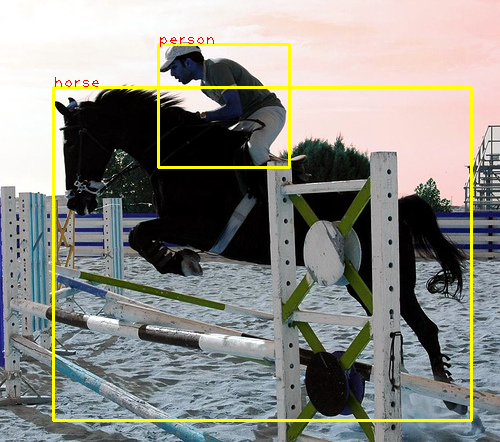

2 object:2
(327, 500, 3)
(327, 500, 3)


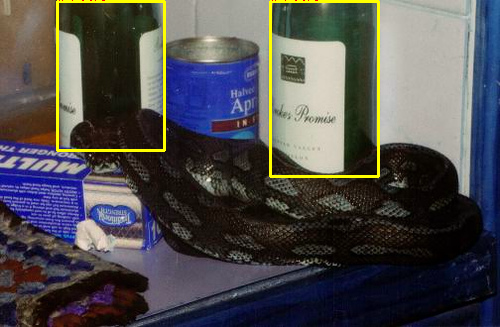

3 object:3
(272, 480, 3)
(272, 480, 3)
(272, 480, 3)


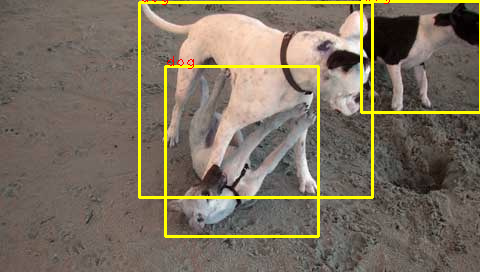

4 object:5
(500, 333, 3)
(500, 333, 3)
(500, 333, 3)
(500, 333, 3)
(500, 333, 3)


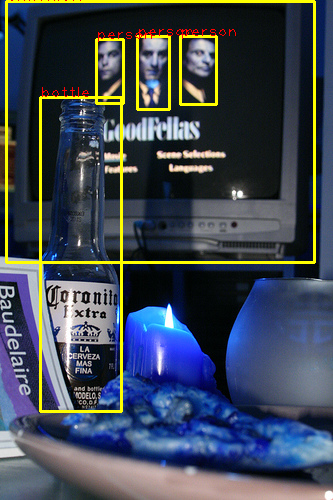

In [112]:
# show some results
for i, sample in enumerate(voc_trainset, 1):
    image, annotation = sample[0], sample[1]['annotation']
    objects = annotation['object']
    show_image = np.array(image)
    print('{} object:{}'.format(i, len(objects)))
    if not isinstance(objects,list):
        object_name = objects['name']
        object_bndbox = objects['bndbox']
        x_min = int(object_bndbox['xmin'])
        y_min = int(object_bndbox['ymin'])
        x_max = int(object_bndbox['xmax'])
        y_max = int(object_bndbox['ymax'])
        show_image = show_object_rect(show_image, (x_min, y_min, x_max, y_max))
        show_image =show_object_name(show_image, object_name, (x_min, y_min))
    else:
        for j in objects:
            object_name = j['name']
            object_bndbox = j['bndbox']
            x_min = int(object_bndbox['xmin'])
            y_min = int(object_bndbox['ymin'])
            x_max = int(object_bndbox['xmax'])
            y_max = int(object_bndbox['ymax'])
            print(show_image.shape)
            show_image = show_object_rect(show_image, (x_min, y_min, x_max, y_max))
            show_image = show_object_name(show_image, object_name, (x_min, y_min))

    cv2_imshow(show_image)
    if i>3:
      break



In [15]:
name_new = ['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow','diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor',]

In [ ]:
print("bird" in name_new)

True


#### Pre-processing the dataset

In [10]:
# ADD YOUR CODE HERE
# transforms.Resize(size=(244,244)),
# transforms.Resize(size=(300,300)),
transformX = transforms.Compose([
                                 transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
        ])
class LoadData(Dataset):
  def __init__(self, data_image):

    super(LoadData, self).__init__()

    self.data_image = data_image

  def __len__(self):
    return len(self.data_image)
  def __getitem__(self,index):
    data = self.data_image[index]
    image, annotation = data[0], data[1]['annotation']
    origial = np.array(image)
    objects = annotation['object']
    image_x = transformX(image)
    box = []
    if not isinstance(objects,list):
        temp = []
        object_name = objects['name']
        object_bndbox = objects['bndbox']
        temp.append(int(name_new.index(object_name)))
        temp.append(int(object_bndbox['xmin']))
        temp.append(int(object_bndbox['ymin']))
        temp.append(int(object_bndbox['xmax']))
        temp.append(int(object_bndbox['ymax']))
        box.append(temp)
    else:
        for j in objects:
            temp = []
            object_name = j['name']
            object_bndbox = j['bndbox']
            temp.append(int(name_new.index(object_name)))
            temp.append(int(object_bndbox['xmin']))
            temp.append(int(object_bndbox['ymin']))
            temp.append(int(object_bndbox['xmax']))
            temp.append(int(object_bndbox['ymax']))
            box.append(temp)
    res = {}
    # print(type(image_x))
    return origial,image_x,box,name_new.index(object_name)

## 2. Models
Load the 3 chosen models for your given task. Show the model's architecture.

In [11]:
dataset_test = LoadData(voc_test)
dataset_test_loader = DataLoader(dataset=dataset_test, batch_size=1, shuffle=True, drop_last=False,pin_memory=True)

In [12]:
def draw_reslut(data,box_data):
  for box in box_data:
    # if box[0]<image.shape[1] and box[2]<image.shape[2] and box[1]<image.shape[1] and box[2]<image.shape[2]:
      data = show_object_rect(data, (int(box[0]),int(box[1]),int(box[2]),int(box[3])))
  print()
  cv2_imshow(data)


In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks')


Mounted at /content/drive


#### Load the models
Show the architectures

In [ ]:
# SSD
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = '/content/drive/MyDrive/Colab Notebooks/checkpoint_ssd300.pth.tar'
checkpoint = torch.load(checkpoint,map_location = device)
start_epoch = checkpoint['epoch'] + 1
print('\nLoaded checkpoint from epoch %d.\n' % start_epoch)
model = checkpoint['model']
model = model.to(device)
model.eval()

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'model.SSD300' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.pooling.MaxPool2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_p


Loaded checkpoint from epoch 232.



SSD300(
  (base): VGGBase(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), 

In [ ]:
def test():
  for i, data in enumerate(dataset_test_loader):
    min_score=0.4
    max_overlap=0.6
    top_k=200
    origial,image_x, original_boxs, origial_labels = data
    print((image_x.shape))
    image_x = image_x.to(device)
    predicted_locs, predicted_scores = model(image_x)
    det_boxes, det_labels, det_scores = model.detect_objects(predicted_locs, predicted_scores, min_score=min_score,
                                                             max_overlap=max_overlap, top_k=top_k)
    print(det_labels)
    det_boxes = det_boxes[0].detach().to('cpu')
    print(det_boxes)
    break
  return np.array(origial), np.array(det_boxes), np.array(original_boxs), np.array(det_labels), np.array(origial_labels), np.array(det_scores)

In [ ]:
origial_image, det_boxes, original_boxs, det_labels,origial_labels, det_scores = test()

torch.Size([1, 3, 300, 300])
[tensor([12], device='cuda:0')]
tensor([[0.2843, 0.1933, 0.9982, 0.9985]])


/content/drive/My Drive/Colab Notebooks/model.py:501: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)
  image_boxes.append(class_decoded_locs[1 - suppress])
/content/drive/My Drive/Colab Notebooks/model.py:503: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)
  image_scores.append(class_scores[1 - suppress])


#### Show some predictions

In [ ]:
origial_image = origial_image.squeeze(0)
origial_image.shape

(375, 500, 3)

In [ ]:
print(origial_image.shape)
original_dims = np.array([origial_image.shape[1], origial_image.shape[0], origial_image.shape[1], origial_image.shape[0]])
print(original_dims)
det_boxes = det_boxes * original_dims
# det_boxes
print(det_boxes)
# print(det_boxes)

(375, 500, 3)
[500 375 500 375]
[[142.16177166  72.48881087 499.11791086 374.42940474]]


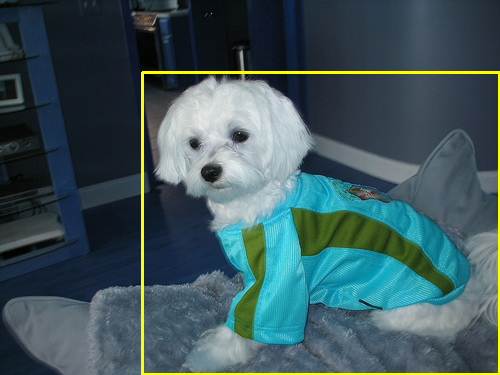

[[142.16177166  72.48881087 499.11791086 374.42940474]]


In [ ]:
draw_reslut(origial_image, np.array(det_boxes))
print(det_boxes)

## 3. Evaluation
This is the most important part. Please give a detailed comparison between the models.

Define your metrics manually. Do not use pre defined Pytorch metrics.

Calculate the metrics for each model on the test set.

Plot the metrics.

Show some predictions in comparison to the ground truth.

In [ ]:
# define 3 metrics to evaluate the result

In [ ]:
# 1) Accuracy
# 2) Precision
# 3) recall


In [319]:
nb_classes = 20
matrix = np.zeros((nb_classes+1,nb_classes+1),dtype=int)

In [29]:
def box_area(box):
  
    return (box[2] - box[0]) * (box[3] - box[1])
    
def cal_iou(boxes1, boxes2):
    area1 = box_area(boxes1.T)
    area2 = box_area(boxes2.T)

    lt = np.maximum(boxes1[:, None, :2], boxes2[:, :2])  # [N,M,2]
    rb = np.minimum(boxes1[:, None, 2:], boxes2[:, 2:])  # [N,M,2]

    inter = np.prod(np.clip(rb - lt, a_min = 0, a_max = None), 2)
    return inter / (area1[:, None] + area2 - inter)  # iou = inter / (area1 + area2 - inter)

In [167]:
 def get_confusion_matrix(num_classes, detections, labels, CONF_THRESHOLD,IOU_THRESHOLD):
      # matrix = np.zeros((nb_classes+1,nb_classes+1),dtype=int)
      detections = detections[detections[:, 4] > CONF_THRESHOLD]
      gt_classes = labels[:, 0].astype(np.int16)
      detection_classes = detections[:, 5].astype(np.int16)
      all_ious = cal_iou(labels[:, 1:], detections[:, :4])
      want_idx = np.where(all_ious > IOU_THRESHOLD)
      all_matches = []
      for i in range(want_idx[0].shape[0]):
          all_matches.append([want_idx[0][i], want_idx[1][i], all_ious[want_idx[0][i], want_idx[1][i]]])
      
      all_matches = np.array(all_matches)
      if all_matches.shape[0] > 0: # if there is match
          all_matches = all_matches[all_matches[:, 2].argsort()[::-1]]

          all_matches = all_matches[np.unique(all_matches[:, 1], return_index = True)[1]]

          all_matches = all_matches[all_matches[:, 2].argsort()[::-1]]

          all_matches = all_matches[np.unique(all_matches[:, 0], return_index = True)[1]]


      for i, label in enumerate(labels):
          if all_matches.shape[0] > 0 and all_matches[all_matches[:, 0] == i].shape[0] == 1:
              gt_class = gt_classes[i]
              detection_class = detection_classes[int(all_matches[all_matches[:, 0] == i, 1][0])]
              matrix[(gt_class), detection_class] += 1
          else:
              gt_class = gt_classes[i]
              matrix[num_classes, (gt_class)] += 1
      
      for i, detection in enumerate(detections):
          if all_matches.shape[0] and all_matches[all_matches[:, 1] == i].shape[0] == 0:
              detection_class = detection_classes[i]
              matrix[detection_class, num_classes] += 1
      

In [ ]:
def test_faster_rcnn():
  for i, data in enumerate(dataset_test_loader):
    # print(data[1].shape)
    origial,image_x, boxs, name = data
    # print(type(image_x))
    image_x = image_x.to(device)
    out = model_resnet50_fpn(image_x)
    #(num_classes, detections, labels, CONF_THRESHOLD,IOU_THRESHOLD):
    get_confusion_matrix(21,)

    labels_pre_ = out[0]['labels'].detach().numpy()
    boxes_pre_ = out[0]['labels'].detach().numpy()
    scores_pre_ = out[0]['scores'].detach().numpy()
    
  return origial,out,boxs, name

In [ ]:
def val():
  for index, data in enumerate(dataset_test_loader):
    min_score=0.4
    max_overlap=0.6
    top_k=200
    origial,image_x, original_boxs, origial_labels = data
 #   print((image_x.shape))
    image_x = image_x.to(device)
    predicted_locs, predicted_scores = model(image_x)
    det_boxes, det_labels, det_scores = model.detect_objects(predicted_locs, predicted_scores, min_score=min_score,
                                                             max_overlap=max_overlap, top_k=top_k)
    det_boxes = list(det_boxes[0].detach().to('cpu').numpy())
    det_labels = det_labels[0].detach().to('cpu').numpy()
    det_scores = det_scores[0].detach().to('cpu').numpy()
    origial_image = origial.squeeze(0)
    original_dims = np.array([origial_image.shape[1], origial_image.shape[0], origial_image.shape[1], origial_image.shape[0]])
    det_boxes = det_boxes * original_dims
    result = []
    for i in range(len(det_labels)):
      # detections (Array[N, 6]), x1, y1, x2, y2, conf, class
      temp = list(det_boxes[i])
      temp.append(det_scores[i])
      temp.append(det_labels[i]-1)
      result.append(temp)
     #(num_classes, detections, labels, CONF_THRESHOLD,IOU_THRESHOLD):
    get_confusion_matrix(21,np.array(result),np.array(original_boxs),0.4,0.2)
    print(index)
    # if index>1500:
    #     break
    # if index>10:
    #   break

#### Evaluate your models

In [ ]:
val()

In [ ]:
matrix

array([[ 122,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    5],
       [   0,  110,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   12],
       [   0,    0,  159,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    7],
       [   0,    0,    0,   89,    0,    0,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    7],
       [   0,    0,    0,    0,  140,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   31],
       [   0,    0,    0,    0,    0,   89,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    7],
       [   0,    0,    0,    0,    0,    0,  273,    0,    0,    0,    0,
           0,    0,    0,    0, 

#### Show the metrics results

In [ ]:
import seaborn as sns

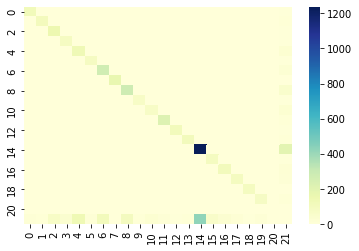

In [ ]:
sns.heatmap(matrix,cmap="YlGnBu")

In [16]:
def Average_Accuracy(confusion_matrix):
    true_positive = np.diag(confusion_matrix)  # TP

    condition_positive = np.sum(confusion_matrix, axis=1)  # TP+FN
    R_per_class = true_positive / (condition_positive + 1e-10)  # TP/P

    AA = np.average(R_per_class)
    return AA

In [ ]:
aa = Average_Accuracy(matrix[:20,:20])

In [ ]:
aa

0.996799828033122

In [15]:
def Over_Accuracy(confusion_matrix):
    OA = np.diag(confusion_matrix).sum() / (np.sum(confusion_matrix) + 1e-10)
    return OA

In [ ]:
oa = Over_Accuracy(matrix[:20,:20])

In [ ]:
oa

0.9952531645569358

In [68]:
def Recall(confusion_matrix):
    true_positive = np.diag(confusion_matrix) # TP
    condition_positive = np.sum(confusion_matrix, axis=1) # TP+FN
    R_per_class = true_positive / (condition_positive+1e-10) # TP/P
    R = np.average(R_per_class)
    return R

In [ ]:
recall = Recall(matrix[:20,:20])

In [ ]:
recall

0.996799828033122

# model2

In [ ]:
%%bash
pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies

In [11]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-11-26 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)



  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [186]:
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images
# print(imgs)
# Inference
results = model(voc_test[5][0])


In [24]:
def trans_str_int(name):
  if name in name_new:
    return name_new.index(name)
  else:
    return 90

In [188]:
result = results.pandas().xyxy[0]
result['class'] = result['name'].apply(trans_str_int)
result

xmin        ymin        xmax        ymax  confidence  class  \
0   193.945312  181.695312  264.648438  234.820312    0.860352      1   
1   214.843750  149.175781  246.875000  220.367188    0.797852     14   
2   370.507812  139.898438  405.859375  207.476562    0.714355     14   
3   283.007812  153.960938  314.257812  218.609375    0.694824     14   
4   470.312500  144.390625  499.218750  200.250000    0.693848     14   
5   405.078125  146.832031  428.515625  202.984375    0.675781     14   
6   457.031250  171.343750  500.000000  210.796875    0.626953      1   
7   311.914062  143.414062  343.164062  230.718750    0.553711     14   
8   309.179688   87.505859  323.632812  117.828133    0.509766     90   
9   435.937500  170.074219  482.031250  210.015625    0.423096      1   
10    0.097656  151.910156   20.629883  217.828125    0.418457     14   
11  444.921875  145.367188  462.890625  199.664062    0.372070     14   
12  130.468750  149.664062  177.148438  229.546875    0.362793     14   
13  109.277344  150.445312  147.558594  226.031250    0.332275     14   
14  130.859375  181.109375  182.617188  231.890625    0.266602     90   

             name  
0         bicycle  
1          person  
2          person  
3          person  
4          person  
5          person  
6         bicycle  
7          person  
8   traffic light  
9         bicycle  
10         person  
11         person  
12         person  
13         person  
14     motorcycle

In [23]:
result.drop(result[result['class'] == 90].index,inplace=True)

In [24]:
result

xmin   ymin    xmax   ymax  confidence  class    name
0  752.0   46.0  1148.0  716.0     0.87500     14  person
1  100.0  201.5  1002.0  718.5     0.57959     14  person

In [25]:
result.drop("name",axis=1,inplace=True)

In [26]:
result

xmin   ymin    xmax   ymax  confidence  class
0  752.0   46.0  1148.0  716.0     0.87500     14
1  100.0  201.5  1002.0  718.5     0.57959     14

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [121]:
# ADD YOUR CODE HERE
# transforms.Resize(size=(244,244)),
transformX = transforms.Compose([transforms.Resize(size=(300,300)),
                                 transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
        ])
class LoadData(Dataset):
  def __init__(self, data_image):

    super(LoadData, self).__init__()

    self.data_image = data_image

  def __len__(self):
    return len(self.data_image)
  def __getitem__(self,index):
    data = self.data_image[index]
    image, annotation = data[0], data[1]['annotation']
    origial = np.array(image)
    objects = annotation['object']
    image_x = transformX(image)
    box = []
    if not isinstance(objects,list):
        temp = []
        object_name = objects['name']
        object_bndbox = objects['bndbox']
        temp.append(int(name_new.index(object_name)))
        temp.append(int(object_bndbox['xmin']))
        temp.append(int(object_bndbox['ymin']))
        temp.append(int(object_bndbox['xmax']))
        temp.append(int(object_bndbox['ymax']))
        box.append(temp)
    else:
        for j in objects:
            temp = []
            object_name = j['name']
            object_bndbox = j['bndbox']
            temp.append(int(name_new.index(object_name)))
            temp.append(int(object_bndbox['xmin']))
            temp.append(int(object_bndbox['ymin']))
            temp.append(int(object_bndbox['xmax']))
            temp.append(int(object_bndbox['ymax']))
            box.append(temp)
    res = {}
    # print(type(image_x))
    
    return image,origial,image_x,box,name_new.index(object_name)

In [258]:
dataset_test = LoadData(voc_test)
dataset_test_loader = DataLoader(dataset=dataset_test, batch_size=1, shuffle=True, drop_last=False,pin_memory=True)

In [13]:
def handle_class_int(result_):
 
  result = result_.pandas().xyxy[0]
  result['class'] = result['name'].apply(trans_str_int)
  result.drop(result[result['class'] == 90].index,inplace=True)
  result.drop("name",axis=1,inplace=True)
  return result

In [14]:
def get_parameter(data):
    image, annotation = data[0], data[1]['annotation']
    origial = np.array(image)
    objects = annotation['object']
    image_x = transformX(image)
    box = []
    if not isinstance(objects,list):
        temp = []
        object_name = objects['name']
        object_bndbox = objects['bndbox']
        temp.append(int(name_new.index(object_name)))
        temp.append(int(object_bndbox['xmin']))
        temp.append(int(object_bndbox['ymin']))
        temp.append(int(object_bndbox['xmax']))
        temp.append(int(object_bndbox['ymax']))
        box.append(temp)
    else:
        for j in objects:
            temp = []
            object_name = j['name']
            object_bndbox = j['bndbox']
            temp.append(int(name_new.index(object_name)))
            temp.append(int(object_bndbox['xmin']))
            temp.append(int(object_bndbox['ymin']))
            temp.append(int(object_bndbox['xmax']))
            temp.append(int(object_bndbox['ymax']))
            box.append(temp)
    return origial,image_x,box,name_new.index(object_name)

In [27]:
nb_classes = 20
matrix = np.zeros((nb_classes+1,nb_classes+1),dtype=int)
def get_confusion_matrix_yolo(num_classes, detections, labels, CONF_THRESHOLD,IOU_THRESHOLD):
      # matrix = np.zeros((nb_classes+1,nb_classes+1),dtype=int)
      detections = detections[detections[:, 4] > CONF_THRESHOLD]
      gt_classes = labels[:, 0].astype(np.int16)
      detection_classes = detections[:, 5].astype(np.int16)
      all_ious = cal_iou(labels[:, 1:], detections[:, :4])
      want_idx = np.where(all_ious > IOU_THRESHOLD)
      all_matches = []
      for i in range(want_idx[0].shape[0]):
          all_matches.append([want_idx[0][i], want_idx[1][i], all_ious[want_idx[0][i], want_idx[1][i]]])
      
      all_matches = np.array(all_matches)
      if all_matches.shape[0] > 0: # if there is match
          all_matches = all_matches[all_matches[:, 2].argsort()[::-1]]

          all_matches = all_matches[np.unique(all_matches[:, 1], return_index = True)[1]]

          all_matches = all_matches[all_matches[:, 2].argsort()[::-1]]

          all_matches = all_matches[np.unique(all_matches[:, 0], return_index = True)[1]]


      for i, label in enumerate(labels):
          if all_matches.shape[0] > 0 and all_matches[all_matches[:, 0] == i].shape[0] == 1:
              gt_class = gt_classes[i]
              detection_class = detection_classes[int(all_matches[all_matches[:, 0] == i, 1][0])]
              matrix[(gt_class), detection_class] += 1
          else:
              gt_class = gt_classes[i]
              matrix[num_classes, (gt_class)] += 1
      
      for i, detection in enumerate(detections):
          if all_matches.shape[0] and all_matches[all_matches[:, 1] == i].shape[0] == 0:
              detection_class = detection_classes[i]
              matrix[detection_class, num_classes] += 1


In [230]:
def val_yolo5(model):
  for index, data in enumerate(voc_test):
    origial,image_x, original_boxs, origial_labels = get_parameter(data)
    #print(index)
    result_all = model(voc_test[index][0])
    result_clean = handle_class_int(result_all)
    result_clean = result_clean.to_numpy()
    get_confusion_matrix_yolo(20,result_clean,np.array(original_boxs),0.4,0.2)

In [ ]:
results = val_yolo5(model)

In [233]:
matrix.shape

(21, 21)

In [236]:
matrix

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,  100,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    4],
       [   0,    0,  132,    0,    0,    0,    0,    2,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    8],
       [   0,    0,    0,   83,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   12],
       [   0,    0,    0,    0,  111,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   28],
       [   0,    0,    0,    0,    0,   90,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    3],
       [   0,    0,    0,    0,    0,    0,  239,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   25],
       [   0,    0,    0,    0,    0,    0,    0,  127,

In [239]:
# show the metrix result
# iou oa aa f1
aa = Average_Accuracy(matrix[1:21,:21])
aa

0.6835502166466881

In [238]:
oa = Over_Accuracy(matrix[1:21,:21])
oa

0.9780146568953705

In [243]:
recall = Recall(matrix[1:20,:20])
recall

0.6835502166466881

In [156]:
# show some predict pictures

In [249]:
def val_yolo5_show_some_pridictions(model):
  for index, data in enumerate(voc_test):
    origial,image_x, original_boxs, origial_labels = get_parameter(data)
    
    result_all = model(voc_test[index][0])
    result_clean = handle_class_int(result_all)
    result_clean = result_clean.to_numpy()
    get_confusion_matrix_yolo(20,result_clean,np.array(original_boxs),0.4,0.2)
    if len(result_clean)>=2:
      draw_reslut(origial, result_clean[:,:4])
    if index >5:
      break

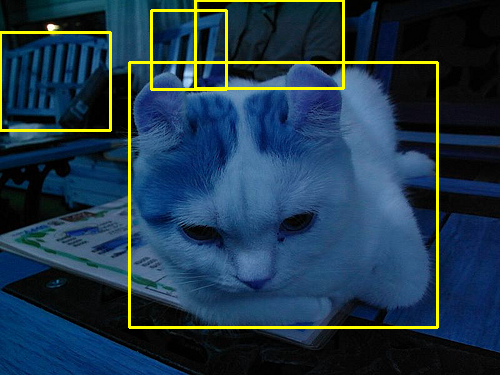

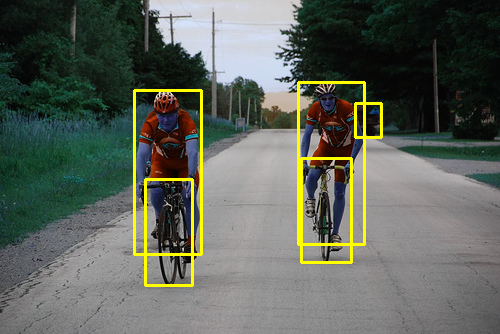

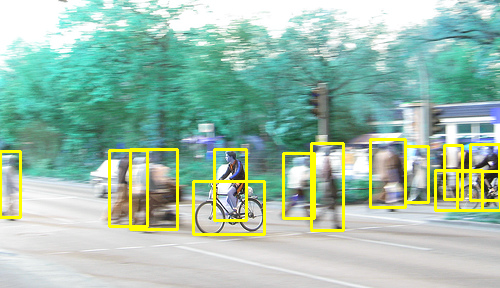

In [250]:
val_yolo5_show_some_pridictions(model)

In [19]:
# model 3 faster rcnn from torchvision
# load model and show the strcture

model_resnet50_fpn = models.detection.fasterrcnn_resnet50_fpn(pretrained=True) # based on coco
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_resnet50_fpn = model_resnet50_fpn.to(device)
model_resnet50_fpn.eval()


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [20]:
import pandas as pd
def clean_faster_rcnn(data):
  result = pd.DataFrame(data, columns = ['xmin',	'ymin',	'xmax',	'ymax',	'confidence',	'class',	'name'])
  result['class'] = result['name'].apply(trans_str_int)
  result.drop(result[result['class'] == 90].index,inplace=True)
  result.drop("name",axis=1,inplace=True)
  return result

In [21]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
name_new = ['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow','diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor',]

In [60]:
def faster_rcnn():
  for index, data in enumerate(dataset_test_loader):
  
    origial,image_x, original_boxs, origial_labels = data
   
    image_x = image_x.to(device)
    out = model_resnet50_fpn(image_x)[0]

    labels = out["labels"].detach().to('cpu').numpy()
    boxes = out["boxes"].detach().to('cpu').numpy()
    scores = out["scores"].detach().to('cpu').numpy()
    result = []
    for i in range(len(labels)):
      temp = [int(da) for da in boxes[i]]
      temp.append(scores[i])
      temp.append(labels[i])
      temp.append(COCO_INSTANCE_CATEGORY_NAMES[labels[i]])
      result.append(temp)
    result = np.array(result)
    if len(result)>=1:
      result = clean_faster_rcnn(result)
      result = result.to_numpy().astype(float)
    if len(result)>=1:
      get_confusion_matrix_yolo(20,result,np.array(original_boxs),0.006,0.2)
  #return origial, out,boxs, name

In [ ]:
faster_rcnn()

In [63]:
oa = Over_Accuracy(matrix[:20,:20])
oa

0.6040268456373812

In [67]:
aa = Average_Accuracy(matrix[1:19,1:19])
aa

0.4940270956373812

In [72]:
recall = Recall(matrix[1:20,:20])
recall

0.46581239097712135

In [167]:
# show some result
def faster_rcnn_draw():
  for index, data in enumerate(dataset_test_loader):
  
    origial,image_x, original_boxs, origial_labels = data
   
    image_x = image_x.to(device)
    out = model_resnet50_fpn(image_x)[0]

    labels = out["labels"].detach().to('cpu').numpy()
    boxes = out["boxes"].detach().to('cpu').numpy()
    scores = out["scores"].detach().to('cpu').numpy()
    result = []
    
    for i in range(len(labels)):
      temp = [int(da) for da in boxes[i]]
      temp.append(scores[i])
      temp.append(labels[i])
      temp.append(COCO_INSTANCE_CATEGORY_NAMES[labels[i]])
      result.append(temp)
    result = np.array(result)
    corner = []
    for i in range(len(scores)):
   
      if scores[i]>0.09:
        temp = [int(da) for da in boxes[i]]
        corner.append(temp)
    if len(result)>=1:
      result = clean_faster_rcnn(result)
      result = result.to_numpy().astype(float)
      origial = origial.squeeze(0).numpy()

      if len(result)>=1:
        print(corner)
        draw_reslut(origial,np.array(corner))
    if index>3:
      break
  #return origial, out,boxs, name

[[29, 104, 379, 458], [13, 127, 435, 386]]



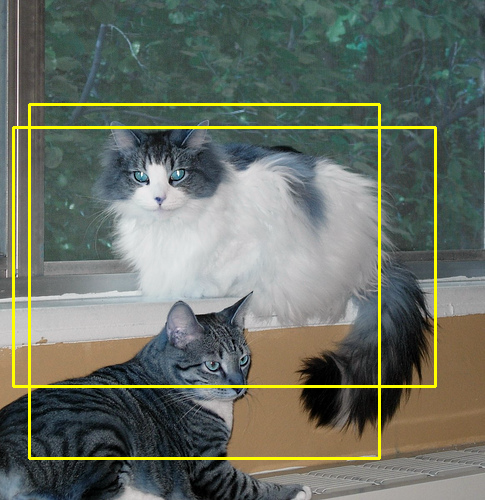

[[244, 338, 328, 372], [14, 0, 375, 128], [296, 201, 312, 205], [7, 0, 375, 130]]



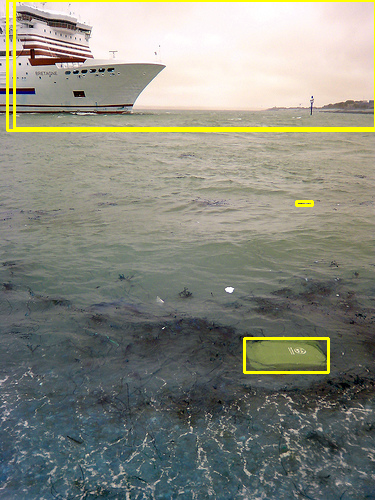

[[183, 83, 313, 284], [205, 138, 222, 155], [344, 142, 377, 164], [312, 9, 500, 294], [28, 236, 61, 262], [29, 320, 45, 333], [179, 140, 210, 173], [9, 78, 135, 242], [26, 77, 117, 190], [54, 239, 78, 263], [29, 318, 46, 330], [318, 137, 374, 171]]



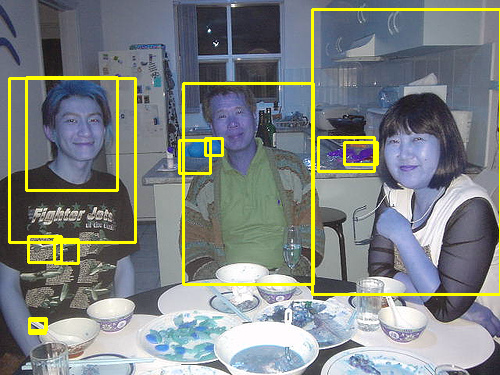

[[12, 278, 312, 412]]



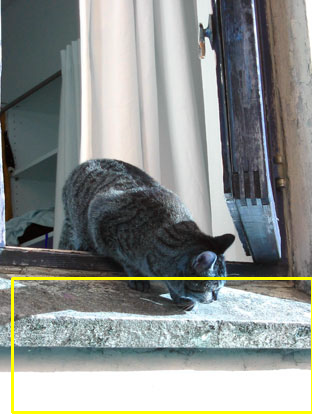

In [168]:
faster_rcnn_draw()

### Question 1
Describe the main differences between the models you chose.


ADD ANSWER HERE

In fact, the three models should have strong detection capabilities, but because the training data is different, the detected data is indeed the same, so it will cause great differences

## 4. Conclusion

### Answer the questions
#### Question 2. 
Which model performed the best? Why do you think it performed better than others?


#### Question 3. 
How could you improve the performance of the models?


ADD ANSWERS HERE

Q1: I chose three models, namely SSD (on the voc data set), yolo (coco and part of the data set), and faster rcnn (coco data set). Among these three models, SSD performance is the last because it is training on the corresponding data set. The obtained pre-trained model, faster rcnn has the worst performance

Q2:Do some train process again